In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 4조 EDA 프로젝트에서 서초구의 데이터 분석 파트를 맡아, 해당 데이터를 이용하여 세션에서 배운 visualization 개념을 적용해보았습니다.

## 폰트 설정 & 색상 통일

In [3]:
# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 129504 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [4]:
# 설치 뒤에 폰트매니저 리빌드해주기
import matplotlib.font_manager as fm
fm._rebuild() 

In [5]:
# 설치된 폰트 확인 
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) 

sys_font number : 48
['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/

In [6]:
#한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴 알아보기
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [8]:
#시각화 색상 통일
col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

- 4조 EDA 프로젝트에서 서초구의 데이터 분석 파트를 맡아, 해당 데이터를 이용하여 세션에서 배운 visualization 개념을 적용해보았습니다.


## 서초구 월별 데이터

- 서초구의 월별 대기오염물질 농도 추이 관찰
- 서울시 월별 평균 대기오염도 정보 데이터를 사용함

In [9]:
df = pd.read_csv('/content/drive/MyDrive/DSL/month.csv', encoding='cp949')
df

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.041,0.012,0.7,0.004,63.0,38.0
1,202301,강남대로,0.044,0.009,1.0,0.004,68.0,44.0
2,202301,강동구,0.033,0.011,0.7,0.003,67.0,44.0
3,202301,강변북로,0.046,0.009,0.9,0.003,65.0,44.0
4,202301,강북구,0.032,0.016,0.8,0.003,64.0,34.0
...,...,...,...,...,...,...,...,...
13835,198701,서초구,0.043,0.027,2.3,0.124,NaN,NaN
13836,198701,성동구,0.039,0.017,5.8,0.200,NaN,NaN
13837,198701,송파구,0.030,0.009,3.1,NaN,NaN,NaN
13838,198701,송파구2,0.039,0.003,3.1,0.083,NaN,NaN


In [10]:
seocho = df[df['측정소명'] == '서초구']
seocho

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
24,202301,서초구,0.041,0.010,0.5,0.003,65.0,41.0
74,202212,서초구,0.029,0.013,0.4,0.002,37.0,18.0
124,202211,서초구,0.032,0.014,0.5,0.002,44.0,24.0
174,202210,서초구,0.024,0.020,0.4,0.002,27.0,14.0
224,202209,서초구,0.020,0.026,0.3,0.002,22.0,10.0
...,...,...,...,...,...,...,...,...
13795,198705,서초구,0.052,0.016,2.5,0.025,NaN,NaN
13805,198704,서초구,0.046,0.041,NaN,0.069,NaN,NaN
13815,198703,서초구,0.036,0.041,1.2,0.076,NaN,NaN
13825,198702,서초구,0.037,0.029,2.8,0.122,NaN,NaN


In [11]:
print(seocho.shape)
print('-' * 10)
print(seocho.isnull().sum())
print('-' * 10)
seocho.head()

(433, 8)
----------
측정월               0
측정소명              0
이산화질소농도(ppm)     14
오존농도(ppm)        12
일산화탄소농도(ppm)     16
아황산가스(ppm)       11
미세먼지(㎍/㎥)       106
초미세먼지(㎍/㎥)      319
dtype: int64
----------


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
24,202301,서초구,0.041,0.010,0.5,0.003,65.0,41.0
74,202212,서초구,0.029,0.013,0.4,0.002,37.0,18.0
124,202211,서초구,0.032,0.014,0.5,0.002,44.0,24.0
174,202210,서초구,0.024,0.020,0.4,0.002,27.0,14.0
224,202209,서초구,0.020,0.026,0.3,0.002,22.0,10.0


In [12]:
#불필요한 column 제거
seocho = seocho[["측정월", "측정소명", "이산화질소농도(ppm)", "오존농도(ppm)", "미세먼지(㎍/㎥)", "초미세먼지(㎍/㎥)"]]
seocho

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
24,202301,서초구,0.041,0.010,65.0,41.0
74,202212,서초구,0.029,0.013,37.0,18.0
124,202211,서초구,0.032,0.014,44.0,24.0
174,202210,서초구,0.024,0.020,27.0,14.0
224,202209,서초구,0.020,0.026,22.0,10.0
...,...,...,...,...,...,...
13795,198705,서초구,0.052,0.016,NaN,NaN
13805,198704,서초구,0.046,0.041,NaN,NaN
13815,198703,서초구,0.036,0.041,NaN,NaN
13825,198702,서초구,0.037,0.029,NaN,NaN


In [13]:
# 편의를 위해 열 이름 변경
seocho.rename(columns = {"이산화질소농도(ppm)":"NO2", "오존농도(ppm)":"O3", "미세먼지(㎍/㎥)":"Dust", "초미세먼지(㎍/㎥)":"F_dust"}, inplace=True)
seocho.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,측정월,측정소명,NO2,O3,Dust,F_dust
24,202301,서초구,0.041,0.010,65.0,41.0
74,202212,서초구,0.029,0.013,37.0,18.0
124,202211,서초구,0.032,0.014,44.0,24.0
174,202210,서초구,0.024,0.020,27.0,14.0
224,202209,서초구,0.020,0.026,22.0,10.0


In [14]:
seocho.isna().sum()

측정월         0
측정소명        0
NO2        14
O3         12
Dust      106
F_dust    319
dtype: int64

In [15]:
#결측치 보간 -> 대기변수별 평균값으로 결측치를 채워줌.
mean_NO2 = seocho['NO2'].mean()
mean_O3 = seocho['O3'].mean()
mean_Dust = seocho['Dust'].mean()
mean_F_dust = seocho['F_dust'].mean()

seocho['NO2'].fillna(mean_NO2, inplace=True)
seocho['O3'].fillna(mean_O3, inplace=True)
seocho['Dust'].fillna(mean_Dust, inplace=True)
seocho['F_dust'].fillna(mean_F_dust, inplace=True)

seocho.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


측정월       0
측정소명      0
NO2       0
O3        0
Dust      0
F_dust    0
dtype: int64

In [16]:
#측정월 column 추가
seocho['month'] = seocho.apply(lambda row: int(str(row['측정월'])[-2:]), axis=1)
seocho.head()

<ipython-input-16-2a3af350b846>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seocho['month'] = seocho.apply(lambda row: int(str(row['측정월'])[-2:]), axis=1)


,측정월,측정소명,NO2,O3,Dust,F_dust,month
24,202301,서초구,0.041,0.010,65.0,41.0,1
74,202212,서초구,0.029,0.013,37.0,18.0,12
124,202211,서초구,0.032,0.014,44.0,24.0,11
174,202210,서초구,0.024,0.020,27.0,14.0,10
224,202209,서초구,0.020,0.026,22.0,10.0,9


In [17]:
month_avg = seocho.groupby(['month']).agg({'NO2' : 'mean', 'O3' : 'mean', 'Dust' : 'mean', 'F_dust': 'mean', 'month' : 'mean'})
month_avg

,NO2,O3,Dust,F_dust,month
month,,,,,
1,0.037689,0.010045,57.986115,24.357041,1.0
2,0.037458,0.013435,60.624618,23.922515,2.0
3,0.036806,0.018972,66.569062,25.033626,3.0
4,0.037847,0.023963,62.346755,23.033626,4.0
5,0.035139,0.027556,59.319062,23.005848,5.0
6,0.034208,0.028019,52.319062,22.116959,6.0
7,0.026791,0.022269,42.291284,21.116959,7.0
8,0.026374,0.020213,38.249660,20.491228,8.0
9,0.029680,0.017297,40.221882,19.935673,9.0


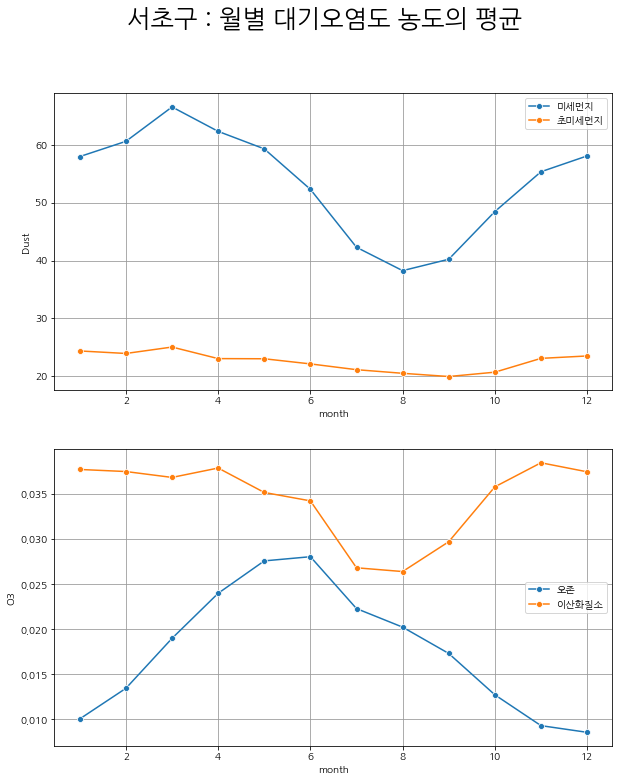

In [18]:
# 측정월에 따른 대기오염도 농도의 평균

fig, axes = plt.subplots(2,1, figsize=(10,12))

sns.lineplot(ax = axes[0], data = month_avg, x = month_avg['month'], y = month_avg['Dust'], marker = 'o', palette = col, label = '미세먼지')
sns.lineplot(ax = axes[0], data = month_avg, x = month_avg['month'], y = month_avg['F_dust'], marker = 'o', palette = col, label = '초미세먼지')

sns.lineplot(ax = axes[1], data = month_avg, x = month_avg['month'], y = month_avg['O3'], marker = 'o', palette = col, label = '오존')  
sns.lineplot(ax = axes[1], data = month_avg, x= month_avg['month'], y = month_avg['NO2'], marker = 'o', palette = col, label = '이산화질소')

for i, ax in enumerate(axes.reshape(-1)) :
  ax.set_facecolor('white')
  ax.grid(b=True, color='#999999')

fig.suptitle('서초구 : 월별 대기오염도 농도의 평균', size = 25)
plt.legend()
plt.show()

In [19]:
month_avg.sort_values(by=['NO2'], ascending=False, inplace=True)
month_avg

,NO2,O3,Dust,F_dust,month
month,,,,,
11,0.038430,0.009297,55.360771,23.074561,11.0
4,0.037847,0.023963,62.346755,23.033626,4.0
1,0.037689,0.010045,57.986115,24.357041,1.0
2,0.037458,0.013435,60.624618,23.922515,2.0
12,0.037428,0.008556,58.096840,23.491228,12.0
3,0.036806,0.018972,66.569062,25.033626,3.0
10,0.035762,0.012713,48.471882,20.685673,10.0
5,0.035139,0.027556,59.319062,23.005848,5.0
6,0.034208,0.028019,52.319062,22.116959,6.0


In [20]:
month_avg.sort_values(by=['O3'], ascending=False, inplace=True)
month_avg

,NO2,O3,Dust,F_dust,month
month,,,,,
6,0.034208,0.028019,52.319062,22.116959,6.0
5,0.035139,0.027556,59.319062,23.005848,5.0
4,0.037847,0.023963,62.346755,23.033626,4.0
7,0.026791,0.022269,42.291284,21.116959,7.0
8,0.026374,0.020213,38.249660,20.491228,8.0
3,0.036806,0.018972,66.569062,25.033626,3.0
9,0.029680,0.017297,40.221882,19.935673,9.0
2,0.037458,0.013435,60.624618,23.922515,2.0
10,0.035762,0.012713,48.471882,20.685673,10.0


In [21]:
month_avg.sort_values(by=['Dust'], ascending=False, inplace=True)
month_avg

,NO2,O3,Dust,F_dust,month
month,,,,,
3,0.036806,0.018972,66.569062,25.033626,3.0
4,0.037847,0.023963,62.346755,23.033626,4.0
2,0.037458,0.013435,60.624618,23.922515,2.0
5,0.035139,0.027556,59.319062,23.005848,5.0
12,0.037428,0.008556,58.096840,23.491228,12.0
1,0.037689,0.010045,57.986115,24.357041,1.0
11,0.038430,0.009297,55.360771,23.074561,11.0
6,0.034208,0.028019,52.319062,22.116959,6.0
10,0.035762,0.012713,48.471882,20.685673,10.0


In [22]:
month_avg.sort_values(by=['F_dust'], ascending=False, inplace=True)
month_avg

,NO2,O3,Dust,F_dust,month
month,,,,,
3,0.036806,0.018972,66.569062,25.033626,3.0
1,0.037689,0.010045,57.986115,24.357041,1.0
2,0.037458,0.013435,60.624618,23.922515,2.0
12,0.037428,0.008556,58.096840,23.491228,12.0
11,0.038430,0.009297,55.360771,23.074561,11.0
4,0.037847,0.023963,62.346755,23.033626,4.0
5,0.035139,0.027556,59.319062,23.005848,5.0
6,0.034208,0.028019,52.319062,22.116959,6.0
7,0.026791,0.022269,42.291284,21.116959,7.0


In [23]:
month_avg['sum'] = month_avg['NO2'] + month_avg['O3'] + month_avg['Dust'] + month_avg['F_dust']
#month_avg.sort_values(by=['sum'], ascending=False, inplace=True)
month_avg

,NO2,O3,Dust,F_dust,month,sum
month,,,,,,
3,0.036806,0.018972,66.569062,25.033626,3.0,91.658466
1,0.037689,0.010045,57.986115,24.357041,1.0,82.390890
2,0.037458,0.013435,60.624618,23.922515,2.0,84.598025
12,0.037428,0.008556,58.096840,23.491228,12.0,81.634053
11,0.038430,0.009297,55.360771,23.074561,11.0,78.483059
4,0.037847,0.023963,62.346755,23.033626,4.0,85.442191
5,0.035139,0.027556,59.319062,23.005848,5.0,82.387605
6,0.034208,0.028019,52.319062,22.116959,6.0,74.498248
7,0.026791,0.022269,42.291284,21.116959,7.0,63.457303


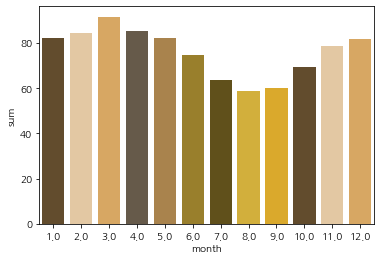

In [24]:
sns.barplot(data=month_avg, x='month', y='sum',palette = col)
plt.show()

- 벚꽃개화시기 (3~4월)의 미세먼지, 초미세먼지, 이산화질소의 농도는 다른 월별 데이터와 비교해봤을 때, 상대적으로 매우 높은 수치를 보이며, 오존의 농도 또한 3,4월에 점점 증가하는 추세를 보임.

##서초구 3&4월 요일별 데이터

- 서초구의 요일별 대기오염물질 농도 추이 관찰
- 서울시 기간별 일평균 대기환경 정보 데이터를 사용함

In [25]:
df1 = pd.read_csv('/content/drive/MyDrive/DSL/day.csv', encoding='cp949')
df1

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,20230113,도심권,중구,0,0,0.000,0.000,0.0,0.000
1,20230113,도심권,종로구,19,12,0.009,0.037,0.8,0.004
2,20230113,도심권,용산구,18,13,0.007,0.036,0.7,0.003
3,20230113,서북권,은평구,14,9,0.017,0.020,1.0,0.004
4,20230113,서북권,서대문구,15,10,0.016,0.024,0.8,0.003
...,...,...,...,...,...,...,...,...,...
9120,20220114,서남권,양천구,33,19,0.010,0.031,0.6,0.003
9121,20220114,동남권,강남구,29,14,0.012,0.028,0.5,0.004
9122,20220114,동남권,서초구,25,13,0.014,0.029,0.5,0.004
9123,20220114,동남권,송파구,33,14,0.010,0.035,0.6,0.004


In [26]:
seocho1 = df1[df1['측정소명'] == '서초구']
seocho1

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
22,20230113,동남권,서초구,24,16,0.005,0.042,0.2,0.003
47,20230112,동남권,서초구,78,54,0.004,0.060,0.4,0.003
72,20230111,동남권,서초구,82,58,0.004,0.066,0.7,0.003
97,20230110,동남권,서초구,61,32,0.006,0.046,0.6,0.003
122,20230109,동남권,서초구,94,42,0.014,0.032,0.5,0.003
...,...,...,...,...,...,...,...,...,...
9022,20220118,동남권,서초구,29,16,0.020,0.023,0.5,0.004
9047,20220117,동남권,서초구,27,13,0.019,0.027,0.4,0.003
9072,20220116,동남권,서초구,38,25,0.023,0.018,0.5,0.003
9097,20220115,동남권,서초구,43,26,0.005,0.049,0.7,0.004


In [27]:
#불필요한 column 제거
seocho1 = seocho1[["측정일자", "측정소명", "이산화질소농도(ppm)", "오존(ppm)", "미세먼지(㎍/㎥)", "초미세먼지(㎍/㎥)"]]
seocho1

,측정일자,측정소명,이산화질소농도(ppm),오존(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
22,20230113,서초구,0.042,0.005,24,16
47,20230112,서초구,0.060,0.004,78,54
72,20230111,서초구,0.066,0.004,82,58
97,20230110,서초구,0.046,0.006,61,32
122,20230109,서초구,0.032,0.014,94,42
...,...,...,...,...,...,...
9022,20220118,서초구,0.023,0.020,29,16
9047,20220117,서초구,0.027,0.019,27,13
9072,20220116,서초구,0.018,0.023,38,25
9097,20220115,서초구,0.049,0.005,43,26


In [28]:
#20220301~20220430

seocho1 = seocho1[(seocho1['측정일자']-20220300) <= 130]
seocho1

,측정일자,측정소명,이산화질소농도(ppm),오존(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
6472,20220430,서초구,0.013,0.038,15,5
6497,20220429,서초구,0.011,0.041,10,1
6522,20220428,서초구,0.028,0.037,80,14
6547,20220427,서초구,0.017,0.045,166,18
6572,20220426,서초구,0.010,0.053,55,14
...,...,...,...,...,...,...
9022,20220118,서초구,0.023,0.020,29,16
9047,20220117,서초구,0.027,0.019,27,13
9072,20220116,서초구,0.018,0.023,38,25
9097,20220115,서초구,0.049,0.005,43,26


In [29]:
seocho1 = seocho1[(seocho1['측정일자']-20220300) >= 1]
seocho1

,측정일자,측정소명,이산화질소농도(ppm),오존(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
6472,20220430,서초구,0.013,0.038,15,5
6497,20220429,서초구,0.011,0.041,10,1
6522,20220428,서초구,0.028,0.037,80,14
6547,20220427,서초구,0.017,0.045,166,18
6572,20220426,서초구,0.010,0.053,55,14
...,...,...,...,...,...,...
7872,20220305,서초구,0.012,0.036,113,15
7897,20220304,서초구,0.035,0.034,82,38
7922,20220303,서초구,0.028,0.030,50,25
7947,20220302,서초구,0.025,0.027,29,13


In [30]:
# 편의를 위해 열 이름 변경
seocho1.rename(columns = {"이산화질소농도(ppm)":"NO2", "오존(ppm)":"O3", "미세먼지(㎍/㎥)":"Dust", "초미세먼지(㎍/㎥)":"F_dust"}, inplace=True)
seocho1.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,측정일자,측정소명,NO2,O3,Dust,F_dust
6472,20220430,서초구,0.013,0.038,15,5
6497,20220429,서초구,0.011,0.041,10,1
6522,20220428,서초구,0.028,0.037,80,14
6547,20220427,서초구,0.017,0.045,166,18
6572,20220426,서초구,0.010,0.053,55,14


In [31]:
seocho1.isna().sum() #모든 항목 결측치 없음

측정일자      0
측정소명      0
NO2       0
O3        0
Dust      0
F_dust    0
dtype: int64

In [32]:
seocho1.shape

(61, 6)

In [33]:
seocho1['day'] = [5, 4, 3, 2, 1, 7, 6] * 8 + [5, 4, 3, 2, 1]
seocho1.head()

<ipython-input-33-a5c83c1aad00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seocho1['day'] = [5, 4, 3, 2, 1, 7, 6] * 8 + [5, 4, 3, 2, 1]


,측정일자,측정소명,NO2,O3,Dust,F_dust,day
6472,20220430,서초구,0.013,0.038,15,5,5
6497,20220429,서초구,0.011,0.041,10,1,4
6522,20220428,서초구,0.028,0.037,80,14,3
6547,20220427,서초구,0.017,0.045,166,18,2
6572,20220426,서초구,0.010,0.053,55,14,1


In [34]:
day_avg = seocho1.groupby(['day']).agg({'NO2' : 'mean', 'O3' : 'mean', 'Dust' : 'mean', 'F_dust': 'mean', 'day' : 'mean'})
day_avg

,NO2,O3,Dust,F_dust,day
day,,,,,
1,0.023444,0.035444,43.777778,22.444444,1.0
2,0.023556,0.032778,60.000000,25.666667,2.0
3,0.023667,0.033444,47.111111,19.888889,3.0
4,0.024111,0.035556,41.111111,19.444444,4.0
5,0.018333,0.037222,43.222222,14.888889,5.0
6,0.014000,0.042125,36.125000,14.500000,6.0
7,0.024250,0.033000,39.875000,20.375000,7.0


In [35]:
day_avg['day'][1] = '월'
day_avg['day'][2] = '화'
day_avg['day'][3] = '수'
day_avg['day'][4] = '목'
day_avg['day'][5] = '금'
day_avg['day'][6] = '토'
day_avg['day'][7] = '일'
day_avg

,NO2,O3,Dust,F_dust,day
day,,,,,
1,0.023444,0.035444,43.777778,22.444444,월
2,0.023556,0.032778,60.000000,25.666667,화
3,0.023667,0.033444,47.111111,19.888889,수
4,0.024111,0.035556,41.111111,19.444444,목
5,0.018333,0.037222,43.222222,14.888889,금
6,0.014000,0.042125,36.125000,14.500000,토
7,0.024250,0.033000,39.875000,20.375000,일


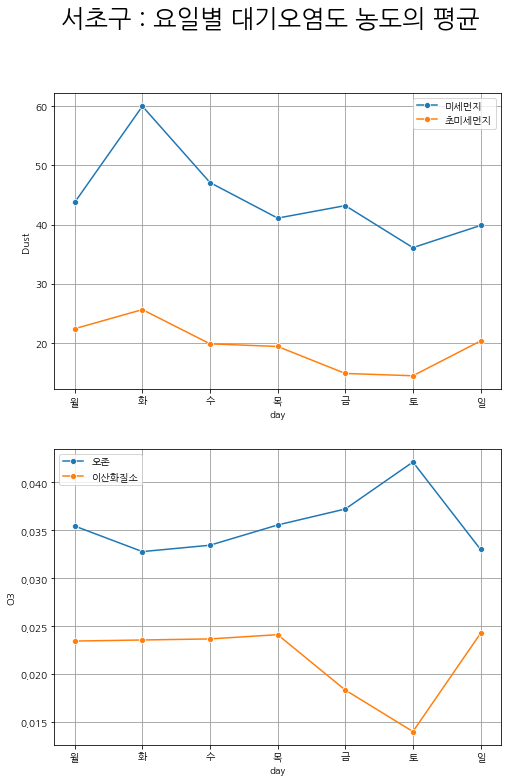

In [36]:
# 측정 요일에 따른 대기오염도 농도의 평균

fig, axes = plt.subplots(2,1, figsize=(8,12))

sns.lineplot(ax = axes[0], data = day_avg, x = day_avg['day'], y = day_avg['Dust'], marker = 'o', palette = col, label = '미세먼지')
sns.lineplot(ax = axes[0], data = day_avg, x = day_avg['day'], y = day_avg['F_dust'], marker = 'o', palette = col, label = '초미세먼지')

sns.lineplot(ax = axes[1], data = day_avg, x = day_avg['day'], y = day_avg['O3'], marker = 'o', palette = col, label = '오존')  
sns.lineplot(ax = axes[1], data = day_avg, x= day_avg['day'], y = day_avg['NO2'], marker = 'o', palette = col, label = '이산화질소')

for i, ax in enumerate(axes.reshape(-1)) :
  ax.set_facecolor('white')
  ax.grid(b=True, color='#999999')

fig.suptitle('서초구 : 요일별 대기오염도 농도의 평균', size = 25)
plt.legend()
plt.show()

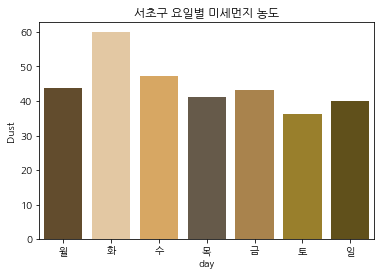

In [37]:
#미세먼지
sns.barplot(data=day_avg, x='day', y='Dust', palette = col)
plt.title("서초구 요일별 미세먼지 농도")
plt.show()

In [38]:
day_avg.sort_values(by=['Dust'], ascending=False, inplace=True)
day_avg 

,NO2,O3,Dust,F_dust,day
day,,,,,
2,0.023556,0.032778,60.000000,25.666667,화
3,0.023667,0.033444,47.111111,19.888889,수
1,0.023444,0.035444,43.777778,22.444444,월
5,0.018333,0.037222,43.222222,14.888889,금
4,0.024111,0.035556,41.111111,19.444444,목
7,0.024250,0.033000,39.875000,20.375000,일
6,0.014000,0.042125,36.125000,14.500000,토


- 미세먼지: 화 > 수 > 월 > 금 > 목 > 일 > 토 -> 주말에 낮은 수치를 보임.

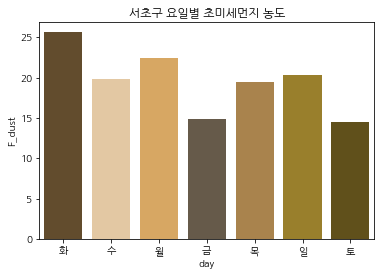

In [39]:
#초미세먼지
sns.barplot(data=day_avg, x='day', y='F_dust', palette = col)
plt.title("서초구 요일별 초미세먼지 농도")
plt.show()

In [40]:
day_avg.sort_values(by=['F_dust'], ascending=False, inplace=True)
day_avg 

,NO2,O3,Dust,F_dust,day
day,,,,,
2,0.023556,0.032778,60.000000,25.666667,화
1,0.023444,0.035444,43.777778,22.444444,월
7,0.024250,0.033000,39.875000,20.375000,일
3,0.023667,0.033444,47.111111,19.888889,수
4,0.024111,0.035556,41.111111,19.444444,목
5,0.018333,0.037222,43.222222,14.888889,금
6,0.014000,0.042125,36.125000,14.500000,토


- 초미세먼지: 화 > 월 > 일 > 수 > 목 > 금 > 토 -> 금, 토에 닞은 수치를 보이고, 월,화에 높은 수피를 보임. 미세먼지와 비슷한 경향성.

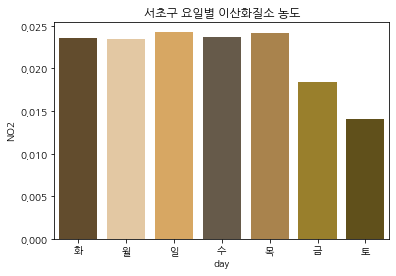

In [41]:
#NO2
sns.barplot(data=day_avg, x='day', y='NO2', palette = col)
plt.title("서초구 요일별 이산화질소 농도")
plt.show()

In [42]:
day_avg.sort_values(by=['NO2'], ascending=False, inplace=True)
day_avg 

,NO2,O3,Dust,F_dust,day
day,,,,,
7,0.024250,0.033000,39.875000,20.375000,일
4,0.024111,0.035556,41.111111,19.444444,목
3,0.023667,0.033444,47.111111,19.888889,수
2,0.023556,0.032778,60.000000,25.666667,화
1,0.023444,0.035444,43.777778,22.444444,월
5,0.018333,0.037222,43.222222,14.888889,금
6,0.014000,0.042125,36.125000,14.500000,토


- NO2: 일 > 목 > 수 > 화 > 월 > 금 > 토 -> 주중에 높은 수치를 보이고, 토요일에 상대적으로 낮아짐.

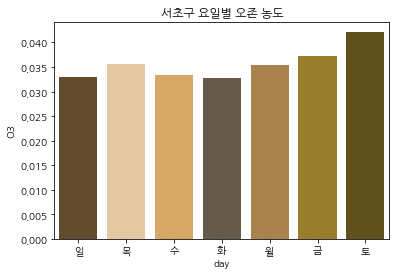

In [43]:
#O3
sns.barplot(data=day_avg, x='day', y='O3', palette = col)
plt.title("서초구 요일별 오존 농도")
plt.show()

In [44]:
day_avg.sort_values(by=['O3'], ascending=False, inplace=True)
day_avg 

,NO2,O3,Dust,F_dust,day
day,,,,,
6,0.014000,0.042125,36.125000,14.500000,토
5,0.018333,0.037222,43.222222,14.888889,금
4,0.024111,0.035556,41.111111,19.444444,목
1,0.023444,0.035444,43.777778,22.444444,월
3,0.023667,0.033444,47.111111,19.888889,수
7,0.024250,0.033000,39.875000,20.375000,일
2,0.023556,0.032778,60.000000,25.666667,화


- O3: 토 > 금 > 목 > 월 > 수 > 일 > 화 -> NO2와 대체로 반대의 경향성을 보임. 토요일에 높은 수치를 보임.

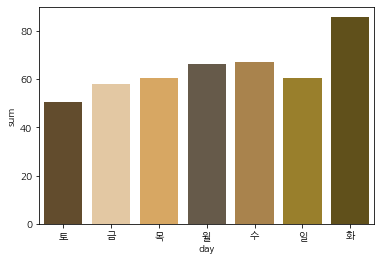

In [45]:
#합산
day_avg['sum'] = day_avg['NO2'] + day_avg['O3'] + day_avg['Dust'] + day_avg['F_dust']
sns.barplot(data=day_avg, x='day', y='sum',palette = col)
plt.show()

In [46]:
day_avg.sort_values(by=['sum'], ascending=False, inplace=True)
day_avg

,NO2,O3,Dust,F_dust,day,sum
day,,,,,,
2,0.023556,0.032778,60.000000,25.666667,화,85.723000
3,0.023667,0.033444,47.111111,19.888889,수,67.057111
1,0.023444,0.035444,43.777778,22.444444,월,66.281111
4,0.024111,0.035556,41.111111,19.444444,목,60.615222
7,0.024250,0.033000,39.875000,20.375000,일,60.307250
5,0.018333,0.037222,43.222222,14.888889,금,58.166667
6,0.014000,0.042125,36.125000,14.500000,토,50.681125


- 미세먼지: 화 > 수 > 월 > 금 > 목 > 일 > 토 -> 주말에 낮은 수치를 보임.
- 초미세먼지: 화 > 월 > 일 > 수 > 목 > 금 > 토 -> 금, 토에 높은 수치를 보이고, 일, 월에 낮은 수피를 보임. 미세먼지와 비슷한 경향성.
- NO2: 일 > 목 > 수 > 화 > 월 > 금 > 토 -> 주중에 높은 수치를 보이고, 주말에 상대적으로 낮아짐.
- O3: 토 > 금 > 목 > 월 > 수 > 일 > 화 -> NO2와 대체로 반대의 경향성을 보임. 토요일에 높은 수치를 보임.

--> 합산: 서초구 3&4월 한강 피크닉은 토요일을 강추!!

## 서초구 3&4월 시간별 데이터

- 서초구의 시간별 대기오염물질 농도 추이 관찰
- 서울시 기간별 시간평균 대기환경 정보 데이터를 사용함

In [58]:
df3 = pd.read_csv('/content/drive/MyDrive/DSL/EDA/time3.csv', encoding='cp949')
df3

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,202003010000,103,서남권,111231,영등포구,33,29,23,0.002,0.050,0.8,0.003
18596,202003010000,104,동남권,111261,강남구,26,25,19,0.008,0.046,0.7,0.002
18597,202003010000,104,동남권,111262,서초구,46,35,27,0.007,0.054,0.5,0.003
18598,202003010000,104,동남권,111274,강동구,36,31,22,0.002,0.043,0.6,0.002


In [59]:
df4 = pd.read_csv('/content/drive/MyDrive/DSL/EDA/time4.csv', encoding='cp949')
df4

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202004302300,100,도심권,111123,종로구,40,43,21,0.036,0.008,0.3,0.003
1,202004302300,100,도심권,111121,중구,31,41,22,0.037,0.010,0.3,0.003
2,202004302300,100,도심권,111131,용산구,41,40,21,0.035,0.011,0.3,0.002
3,202004302300,101,서북권,111181,은평구,32,37,20,0.053,0.005,0.3,0.003
4,202004302300,101,서북권,111201,마포구,34,34,21,0.043,0.009,0.3,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,202004010000,103,서남권,111301,양천구,52,48,25,0.026,0.030,0.5,0.005
17996,202004010000,104,동남권,111273,송파구,51,48,22,0.020,0.041,0.6,0.003
17997,202004010000,104,동남권,111261,강남구,44,43,25,0.025,0.038,0.5,0.003
17998,202004010000,104,동남권,111274,강동구,51,49,23,0.018,0.040,0.5,0.004


In [60]:
df5 = pd.concat([df3, df4])
df5

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,202004010000,103,서남권,111301,양천구,52,48,25,0.026,0.030,0.5,0.005
17996,202004010000,104,동남권,111273,송파구,51,48,22,0.020,0.041,0.6,0.003
17997,202004010000,104,동남권,111261,강남구,44,43,25,0.025,0.038,0.5,0.003
17998,202004010000,104,동남권,111274,강동구,51,49,23,0.018,0.040,0.5,0.004


In [61]:
seocho3 = df5[df5['측정소명'] == '서초구']
seocho3 = seocho3[["측정일시", "측정소명", "이산화질소농도(ppm)", "오존(ppm)", "미세먼지 24시간(㎍/㎥)", "초미세먼지(㎍/㎥)"]]
seocho3.rename(columns = {"이산화질소농도(ppm)":"NO2", "오존(ppm)":"O3", "미세먼지 24시간(㎍/㎥)":"Dust", "초미세먼지(㎍/㎥)":"F_dust"}, inplace=True)
seocho3.head(24)

,측정일시,측정소명,NO2,O3,Dust,F_dust
22,202003312300,서초구,0.035,0.032,51,25
48,202003312200,서초구,0.035,0.033,51,20
72,202003312100,서초구,0.031,0.039,53,17
98,202003312000,서초구,0.031,0.044,57,21
121,202003311900,서초구,0.025,0.054,59,22
148,202003311800,서초구,0.030,0.054,60,31
173,202003311700,서초구,0.035,0.050,59,37
199,202003311600,서초구,0.043,0.049,58,50
222,202003311500,서초구,0.048,0.045,58,48
249,202003311400,서초구,0.042,0.040,58,32


In [62]:
seocho3.isna().sum()

측정일시      0
측정소명      0
NO2       0
O3        0
Dust      0
F_dust    0
dtype: int64

In [63]:
seocho3.shape

(1464, 6)

In [64]:
seocho3['time'] = [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 24] * 61 
seocho3.head()

,측정일시,측정소명,NO2,O3,Dust,F_dust,time
22,202003312300,서초구,0.035,0.032,51,25,23
48,202003312200,서초구,0.035,0.033,51,20,22
72,202003312100,서초구,0.031,0.039,53,17,21
98,202003312000,서초구,0.031,0.044,57,21,20
121,202003311900,서초구,0.025,0.054,59,22,19


In [65]:
time_avg = seocho3.groupby(['time']).agg({'NO2' : 'mean', 'O3' : 'mean', 'Dust' : 'mean', 'F_dust': 'mean', 'time' : 'mean'})
time_avg

,NO2,O3,Dust,F_dust,time
time,,,,,
1,0.029475,0.031197,44.524590,25.950820,1.0
2,0.026967,0.031852,44.344262,26.213115,2.0
3,0.025016,0.031984,43.737705,25.803279,3.0
4,0.023934,0.032230,43.262295,25.868852,4.0
5,0.024934,0.030639,43.049180,27.180328,5.0
6,0.029607,0.026426,42.901639,27.786885,6.0
7,0.035000,0.022295,43.229508,27.868852,7.0
8,0.035066,0.023525,44.131148,28.491803,8.0
9,0.031672,0.027328,45.836066,29.655738,9.0


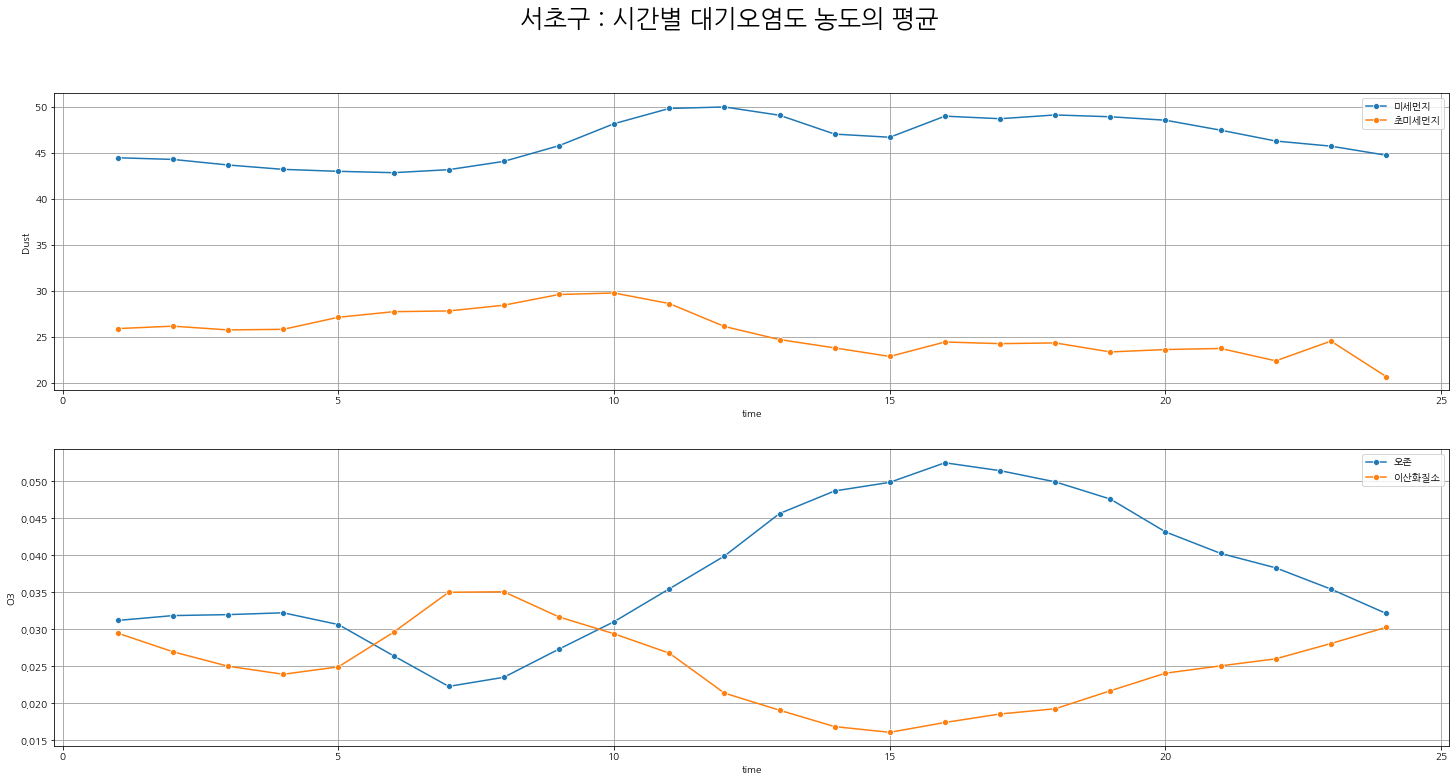

In [66]:
# 측정 시간에 따른 대기오염도 농도의 평균

fig, axes = plt.subplots(2,1, figsize=(25,12))

sns.lineplot(ax = axes[0], data = time_avg, x = time_avg['time'], y = time_avg['Dust'], marker = 'o', palette = col, label = '미세먼지')
sns.lineplot(ax = axes[0], data = time_avg, x = time_avg['time'], y = time_avg['F_dust'], marker = 'o', palette = col, label = '초미세먼지')

sns.lineplot(ax = axes[1], data = time_avg, x = time_avg['time'], y = time_avg['O3'], marker = 'o', palette = col, label = '오존')  
sns.lineplot(ax = axes[1], data = time_avg, x= time_avg['time'], y = time_avg['NO2'], marker = 'o', palette = col, label = '이산화질소')

for i, ax in enumerate(axes.reshape(-1)) :
  ax.set_facecolor('white')
  ax.grid(b=True, color='#999999')

fig.suptitle('서초구 : 시간별 대기오염도 농도의 평균', size = 25)
plt.legend()
plt.show()

In [67]:
time_avg.sort_values(by=['Dust'], ascending=False, inplace=True)
time_avg

,NO2,O3,Dust,F_dust,time
time,,,,,
12,0.021393,0.039885,50.049180,26.180328,12.0
11,0.026787,0.035459,49.885246,28.672131,11.0
18,0.019279,0.049902,49.180328,24.393443,18.0
13,0.019082,0.045623,49.147541,24.754098,13.0
16,0.017426,0.052475,49.049180,24.491803,16.0
19,0.021705,0.047574,48.983607,23.409836,19.0
17,0.018574,0.051410,48.770492,24.311475,17.0
20,0.024082,0.043148,48.606557,23.672131,20.0
10,0.029393,0.031033,48.229508,29.819672,10.0


In [68]:
time_avg.sort_values(by=['F_dust'], ascending=False, inplace=True)
time_avg

,NO2,O3,Dust,F_dust,time
time,,,,,
10,0.029393,0.031033,48.229508,29.819672,10.0
9,0.031672,0.027328,45.836066,29.655738,9.0
11,0.026787,0.035459,49.885246,28.672131,11.0
8,0.035066,0.023525,44.131148,28.491803,8.0
7,0.035000,0.022295,43.229508,27.868852,7.0
6,0.029607,0.026426,42.901639,27.786885,6.0
5,0.024934,0.030639,43.049180,27.180328,5.0
2,0.026967,0.031852,44.344262,26.213115,2.0
12,0.021393,0.039885,50.049180,26.180328,12.0


In [69]:
time_avg.sort_values(by=['NO2'], ascending=False, inplace=True)
time_avg

,NO2,O3,Dust,F_dust,time
time,,,,,
8,0.035066,0.023525,44.131148,28.491803,8.0
7,0.035000,0.022295,43.229508,27.868852,7.0
9,0.031672,0.027328,45.836066,29.655738,9.0
24,0.030262,0.032148,44.803279,20.737705,24.0
6,0.029607,0.026426,42.901639,27.786885,6.0
1,0.029475,0.031197,44.524590,25.950820,1.0
10,0.029393,0.031033,48.229508,29.819672,10.0
23,0.028082,0.035426,45.786885,24.590164,23.0
2,0.026967,0.031852,44.344262,26.213115,2.0


In [70]:
time_avg.sort_values(by=['O3'], ascending=False, inplace=True)
time_avg

,NO2,O3,Dust,F_dust,time
time,,,,,
16,0.017426,0.052475,49.049180,24.491803,16.0
17,0.018574,0.051410,48.770492,24.311475,17.0
18,0.019279,0.049902,49.180328,24.393443,18.0
15,0.016098,0.049836,46.754098,22.918033,15.0
14,0.016869,0.048672,47.098361,23.852459,14.0
19,0.021705,0.047574,48.983607,23.409836,19.0
13,0.019082,0.045623,49.147541,24.754098,13.0
20,0.024082,0.043148,48.606557,23.672131,20.0
21,0.025066,0.040246,47.524590,23.786885,21.0


In [71]:
time_avg['sum'] = time_avg['NO2'] + time_avg['O3'] + time_avg['Dust'] + time_avg['F_dust']
time_avg.sort_values(by=['sum'], ascending=False, inplace=True)
time_avg

,NO2,O3,Dust,F_dust,time,sum
time,,,,,,
11,0.026787,0.035459,49.885246,28.672131,11.0,78.619623
10,0.029393,0.031033,48.229508,29.819672,10.0,78.109607
12,0.021393,0.039885,50.049180,26.180328,12.0,76.290787
9,0.031672,0.027328,45.836066,29.655738,9.0,75.550803
13,0.019082,0.045623,49.147541,24.754098,13.0,73.966344
18,0.019279,0.049902,49.180328,24.393443,18.0,73.642951
16,0.017426,0.052475,49.049180,24.491803,16.0,73.610885
17,0.018574,0.051410,48.770492,24.311475,17.0,73.151951
8,0.035066,0.023525,44.131148,28.491803,8.0,72.681541


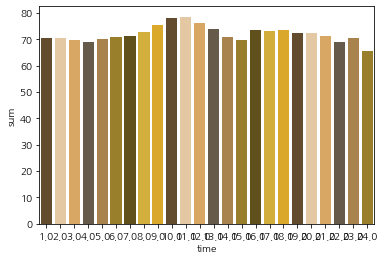

In [72]:
sns.barplot(data=time_avg, x='time', y='sum',palette = col)
plt.show()

In [79]:
data = pd.read_csv('/content/drive/MyDrive/DSL/eda.csv', encoding='cp949')

In [80]:
correlation = data.corr()

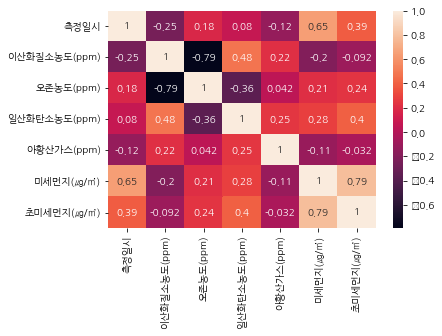

In [83]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)